# Introduction
 - we have to find out the impact of each marketing strategy for each company

### 1. Data Loading and Quality Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import scipy.stats


# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
file = pd.read_csv('G:\Work\Data analyst\campagin project python\Campaign-Data.csv')
file.isnull().any()

Client ID                False
Client Type              False
Number of Customers      False
Montly Target            False
Zip Code                 False
Calendardate             False
Amount Collected         False
Unit Sold                False
Campaign (Email)         False
Campaign (Flyer)         False
Campaign (Phone)         False
Sales Contact 1          False
Sales Contact 2          False
Sales Contact 3          False
Sales Contact 4          False
Sales Contact 5          False
Number of Competition    False
dtype: bool

In [3]:
file.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

- Here `amount collected` is the target column
- `  'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5'` these are the feature to work on

### 2. Feature Engineering

In [4]:
# extracting time from the dataset
file['Calendardate'] = pd.to_datetime(file['Calendardate'])
file['year'] = file['Calendardate'].dt.year
file['month'] = file['Calendardate'].dt.month

### 3. EDA

In [5]:
file.groupby('year')['Number of Customers','Amount Collected'].sum()

,Number of Customers,Amount Collected
year,,
2014,2167920,12419131028
2015,2167920,38185960072


In [6]:
file.groupby('Client Type')['Amount Collected','Number of Customers'].sum()

,Amount Collected,Number of Customers
Client Type,,
Large Facility,27358365140,1888992
Medium Facility,20543023704,1986144
Private Facility,1327984928,105792
Small Facility,1375717328,354912


In [7]:
file["Client Type"].value_counts(normalize=True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: Client Type, dtype: float64

In [8]:
# bujhi nai, study
pd.crosstab(file['Client Type'],file['Number of Competition'],margins=True,normalize='columns')

Number of Competition,High,Low,All
Client Type,,,
Large Facility,0.459677,0.459677,0.459677
Medium Facility,0.169355,0.169355,0.169355
Private Facility,0.088710,0.088710,0.088710
Small Facility,0.282258,0.282258,0.282258


In [9]:
pd.crosstab(file['Client Type'],file['Number of Competition'],normalize=True)

Number of Competition,High,Low
Client Type,,
Large Facility,0.076613,0.383065
Medium Facility,0.028226,0.141129
Private Facility,0.014785,0.073925
Small Facility,0.047043,0.235215


In [10]:
file.groupby('Number of Competition')['Amount Collected'].mean()

Number of Competition
High    2.974789e+07
Low     1.445570e+07
Name: Amount Collected, dtype: float64

In [11]:
file.groupby('Client Type')['Amount Collected'].mean()

Client Type
Large Facility      1.999880e+07
Medium Facility     4.075997e+07
Private Facility    5.030246e+06
Small Facility      1.637759e+06
Name: Amount Collected, dtype: float64

- So it is seen that, medium facility has the largest earning.

### 4. Correlations

<AxesSubplot: >

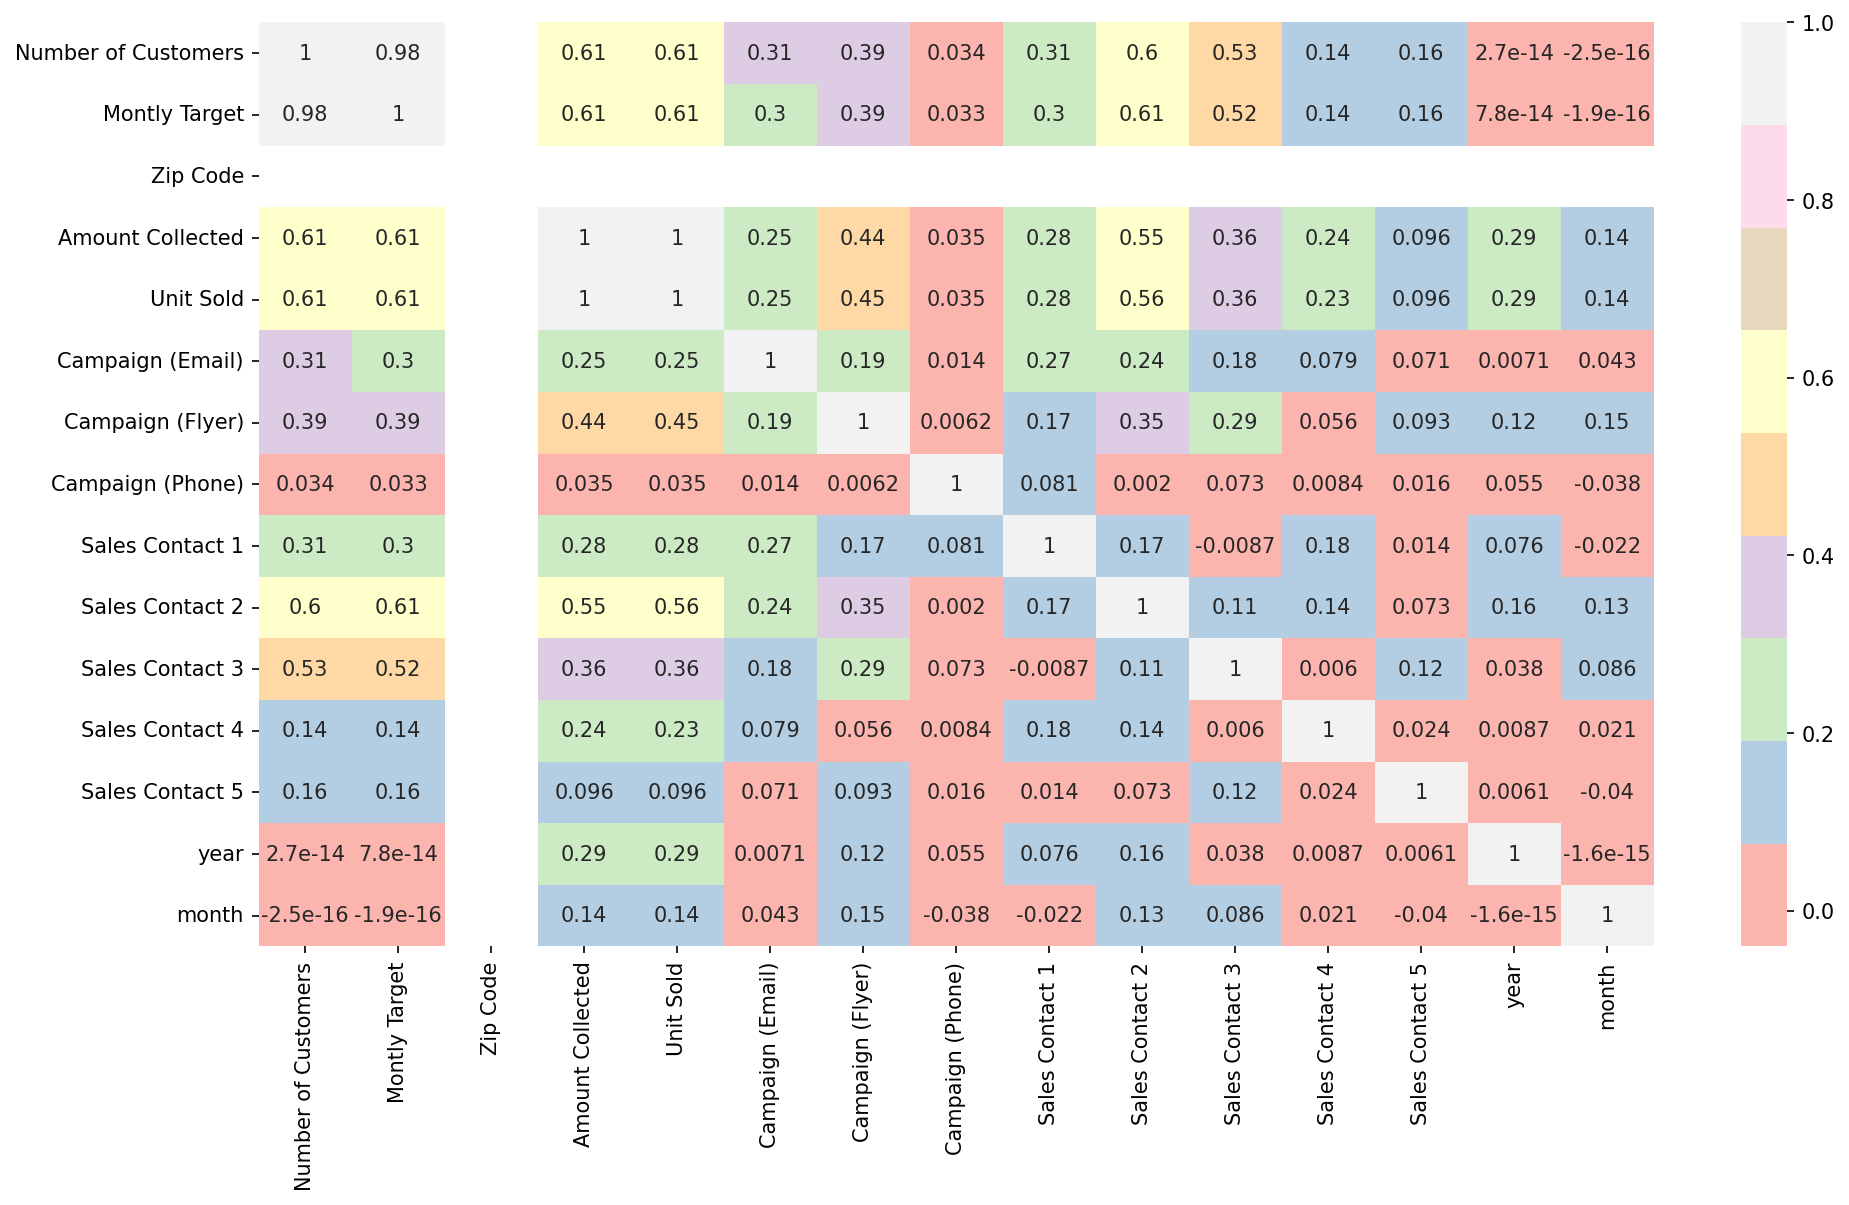

In [12]:
# Overall correaltion in the data

plt.figure(figsize=(15,8),dpi=150)
sns.heatmap(file.corr(),cmap='Pastel1', annot=True)

<AxesSubplot: >

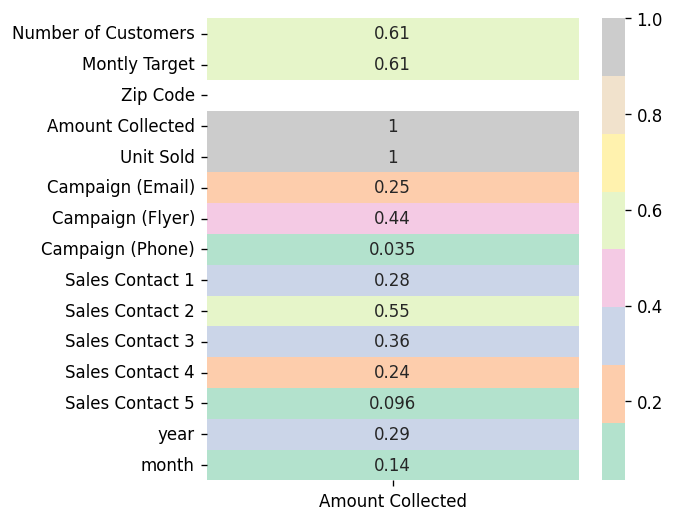

In [13]:
plt.figure(figsize=(5,5),dpi=120)
sns.heatmap(file.corr()[["Amount Collected"]],cmap='Pastel2', annot=True)

In [14]:
# correlation with respect to the type of client

correlation_analysis=pd.DataFrame(file.groupby('Client Type')[['Amount Collected',
                                                               'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                                               'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                                               'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Client Type','Amount Collected'],ascending=False)
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Variable Impact on Sales']!='Amount Collected'].reset_index(drop=True)
correlation_analysis.style.background_gradient(cmap='Pastel1').set_precision(2)

,Acc Type,Variable Impact on Sales,Impact
0,Small Facility,Sales Contact 2,0.22
1,Small Facility,Sales Contact 3,0.07
2,Small Facility,Campaign (Email),0.06
3,Small Facility,Campaign (Flyer),0.04
4,Small Facility,Sales Contact 4,0.02
5,Small Facility,Sales Contact 5,0.00
6,Small Facility,Sales Contact 1,-0.02
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.57
9,Private Facility,Campaign (Flyer),0.28


In [15]:
# pure correlation, no graphical presentation
# Same as the upper one
correlation_analysis=pd.DataFrame(file.groupby('Client Type')[['Amount Collected',
                                                               'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                                               'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                                               'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected'])

correlation_analysis

Amount Collected
Client Type                                        
Large Facility   Amount Collected          1.000000
                 Campaign (Email)          0.092158
                 Campaign (Flyer)          0.319793
                 Campaign (Phone)          0.009944
                 Sales Contact 1           0.287753
                 Sales Contact 2           0.420754
                 Sales Contact 3           0.189714
                 Sales Contact 4           0.278329
                 Sales Contact 5          -0.005424
Medium Facility  Amount Collected          1.000000
                 Campaign (Email)          0.264880
                 Campaign (Flyer)          0.453612
                 Campaign (Phone)          0.021057
                 Sales Contact 1           0.273386
                 Sales Contact 2           0.509677
                 Sales Contact 3           0.216190
                 Sales Contact 4           0.149488
                 Sales Contact 5           0.103279
Private Facility Amount Collected          1.000000
                 Campaign (Email)         -0.016778
                 Campaign (Flyer)          0.280098
                 Campaign (Phone)          0.060602
                 Sales Contact 1          -0.007462
                 Sales Contact 2           0.574481
                 Sales Contact 3           0.175525
                 Sales Contact 4           0.096192
                 Sales Contact 5           0.134409
Small Facility   Amount Collected          1.000000
                 Campaign (Email)          0.060200
                 Campaign (Flyer)          0.040600
                 Campaign (Phone)               NaN
                 Sales Contact 1          -0.015594
                 Sales Contact 2           0.219759
                 Sales Contact 3           0.068269
                 Sales Contact 4           0.024401
                 Sales Contact 5           0.000927

### Regression Analysis
- Market Sales and Strategy
- `OLS` is called Ordinary Least Square. This is a regression method. This will generate a report for easy explanation

In [16]:
import statsmodels.formula.api as smf

In [17]:
# file.columns=[mystring.replace(" ", "_") for mystring in file.columns]
# file.columns=[mystring.replace("(", "") for mystring in file.columns]
# file.columns=[mystring.replace(")", "") for mystring in file.columns]

In [18]:
x = file['Amount Collected']
y = file[['Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
                                                               'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
                                                               'Sales Contact 4', 'Sales Contact 5']]

In [19]:
statmodel = smf.ols('x~y',data=file)
fittedModel = statmodel.fit()
print(statmodel.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:52:13   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.481e+06   5.12e+05      2.891      0.0

# Explaining the OLS Report

1. Here the R^2 is 0.48. So, 48% of the variation in dependent variable is explained from the dataset. Ideal would have been near to 1.
2. R^2 and adjusted R^2 values are very close here. So every parameter is participating in determining the variation. 
3. `F-Statistics` value is very high here compared to `Prob (F-Stat)`. This means there is linear relation between the target and feature variables.
4. `T Test` : Here the `Campaign (Phone)` has a p>|t| of 0.944. This means this feature is irrelevent to the regression.

In [20]:
fittedModel.params

Intercept    1.481206e+06
y[0]         7.932022e-01
y[1]         3.337560e+00
y[2]         7.336071e-02
y[3]         4.236796e+00
y[4]         3.638215e+00
y[5]         2.343240e+00
y[6]         1.094783e+01
y[7]         3.507795e+00
dtype: float64

In [21]:
# just a hard way of doing things

# file.columns=[mystring.replace(" ", "_") for mystring in file.columns]
# file.columns=[mystring.replace("(", "") for mystring in file.columns]
# file.columns=[mystring.replace(")", "") for mystring in file.columns]
# results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
#        Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5',data=file).fit()
# print(results.summary())

In [22]:
file.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition', 'year',
       'month'],
      dtype='object')

In [23]:
file_Type = file['Client Type'].unique()

In [24]:
for i in file_Type:
    print(i)

Medium Facility
Large Facility 
Small Facility 
Private Facility


# ERROR in row vs col size

In [28]:
# for i in file_Type:
#     temp_data=file[file['Client Type']==i].copy()
#     temp_model = smf.ols('x~y',data=temp_data)
#     # fittedModel = statmodel.fit()
#     print(temp_model.fit().summary())
